In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## 데이터 살펴보기 

In [200]:
cc_df = pd.read_csv('../data/fraud.csv')

df = cc_df.copy()

In [201]:
pd.set_option('display.max_columns', 50)

In [202]:
df.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [204]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


## 변수 확인하기

In [205]:
pd.DataFrame(df["merchant"].value_counts())

,merchant
fraud_Kilback LLC,1602
fraud_Cormier LLC,1455
fraud_Kuhn LLC,1446
fraud_Schumm PLC,1392
fraud_Boyer PLC,1375
...,...
fraud_Little-Gleichner,228
"fraud_Douglas, DuBuque and McKenzie",228
fraud_Satterfield-Lowe,227
fraud_Reichert-Weissnat,226


- 가게 이름이 fraud로 시작하며, 높은 빈도수를 보이는 장소는 LLC, PLC가 붙어 있다.
- 따라서 내부 변수 각각을 확인해보기로 했다.

In [206]:
merchant = df["merchant"]

In [207]:
merchant.apply(lambda x: 1 if x.endswith("LLC") or x.endswith("PLC") else 0).sum()

61994

In [208]:
df["merchant"].count()

491134

In [209]:
df["merchant_LC"] = merchant.apply(lambda x: 1 if x.endswith("LLC") or x.endswith("PLC") else 0)

In [210]:
df[(df["merchant_LC"] == 1) & (df["is_fraud"] == 1)]["is_fraud"].sum()

155

- 확인해본 결과, LLC, PLC가 붙은 이름의 이상거래비율은 0.1% 정도이기에
- 가게의 이름은 거의 상관이 없는 것으로 판단된다.
- 따라서 생성된 merchant_LC 열과 merchant열은 제거하기로 판단했다.

In [211]:
df.drop("merchant_LC", inplace = True, axis=1)

#### job 컬럼 확인

In [212]:
df["job"].value_counts()

Environmental consultant    8777
Comptroller                 8766
Immunologist                8760
Water engineer              8740
Film/video editor           8035
                            ... 
Energy engineer             3642
Intelligence analyst        3641
Toxicologist                3638
Herbalist                   3638
Physiotherapist             3638
Name: job, Length: 110, dtype: int64

In [213]:
df[(df["job"] == "Environmental counsultant") & (df["is_fraud"] == 1)]["is_fraud"].sum()

0

In [214]:
df[(df["job"] == "Comptroller") & (df["is_fraud"] == 1)]["is_fraud"].sum()

26

In [215]:
df[(df["job"] == "Physiotherapist") & (df["is_fraud"] == 1)]["is_fraud"].sum()

6

In [216]:
df[(df["job"] == "Herbalist") & (df["is_fraud"] == 1)]["is_fraud"].sum()

10

- Job 컬럼도 크게 의미가 없다고 판단되었다.

뿐만 아니라, 거래 지역, 카드 소유자 관련 정보, 거래 식별자, 발생한 시간과 같이

이상거래 탐지에 필요가 없을 것이라고 판단되는요인들에 대해서 제거하기로 결정했다.

### 의미 없는 변수 제거

1. merchant : 신용카드 거래 대상 가맹점
2. first, last : 카드 소유자의 이름 및 성
3. street : 카드 소유자의 거주지 도로 주소
4. city, state : 거주지 도시, 주
5. zip : 우편번호
6. job : 직업
7. trans_num : 거래 식별자
8. unix_time : 거래가 발생한 unix 시간

In [217]:
df.drop(['merchant','first','last','street','city','state','zip','job','trans_num','unix_time'], axis = 1, inplace= True)

### 데이터 중복값 및 결측치 확인

In [218]:
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
category                 0
amt                      0
gender                   0
lat                      0
long                     0
city_pop                 0
dob                      0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [219]:
df.duplicated().sum()

0

- 데이터를 확인해본 결과, 결측치와 중복값은 존재하지 않는 것으로 확인된다.
- 따라서 이어서 숫자형 변수의 이상치를 확인한 뒤, Feature engineering을 진행해보기로 했다.

### 이상치 확인하기

In [220]:
object_cols = df.select_dtypes(include=['int', 'float']).columns
print(object_cols)

Index(['cc_num', 'amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long',
       'is_fraud'],
      dtype='object')


In [221]:
df["cc_num"].unique().size

124

- 124개의 카드에서 모두 이상거래가 발생한 것을 알 수 있었다.

In [222]:
df.groupby("cc_num").sum("is_fraud").sort_values("is_fraud", ascending = False).head(10)

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
cc_num,,,,,,,
6538441737335434,336174.28,181763.3592,-352129.4784,2661552,181790.096533,-352107.808389,18
3518669219150142,185348.36,143111.4678,-307787.3820,114713676,143141.071945,-307713.693979,16
3589289942931264,224387.58,160145.8620,-357192.5760,1255380,160147.898244,-357195.291242,16
6538891242532018,383817.40,158003.0184,-398813.7168,31381830,158047.355337,-398856.968441,16
3576021480694169,184001.38,143382.9456,-350653.2272,598752560,143376.518036,-350653.084891,16
2720433095629877,223164.55,192707.5050,-306029.5344,14101776,192702.712155,-306073.694852,16
3556613125071656,184705.83,106312.8773,-349406.2061,105213479,106301.058065,-349430.748546,16
213112402583773,254834.08,149062.7880,-360047.8260,6670740,149093.118131,-360033.017919,16
376445266762684,247231.07,180180.0924,-442773.4080,7832242,180248.268391,-442856.842313,15


In [223]:
df["amt"].unique().size

36446

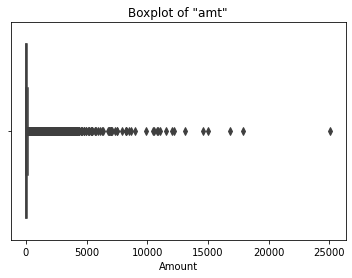

In [224]:
sns.boxplot(x=df['amt'])
plt.title('Boxplot of "amt"')
plt.xlabel('Amount')
plt.show()

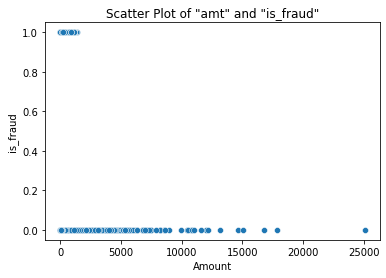

In [225]:
sns.scatterplot(x='amt', y='is_fraud', data=df)
plt.title('Scatter Plot of "amt" and "is_fraud"')
plt.xlabel('Amount')
plt.ylabel('is_fraud')
plt.show()

고액 거래는 대부분 is_fraud가 아닌 것을 볼 수 있었다.

일단, amt 열을 전체적으로 standard scaling을 진행하고 이를 amt_scaled라는 column으로 생성했다.

In [226]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df["amt_scaled"] = scaler.fit_transform(df[["amt"]])

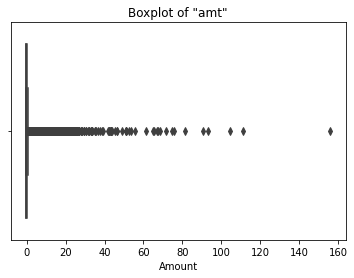

In [227]:
sns.boxplot(x=df['amt_scaled'])
plt.title('Boxplot of "amt"')
plt.xlabel('Amount')
plt.show()

## Object type data 전처리하기

In [228]:
object_cols = df.select_dtypes(include=['object']).columns
print(object_cols)

Index(['trans_date_trans_time', 'category', 'gender', 'dob'], dtype='object')


In [229]:
df[object_cols].head(2)

,trans_date_trans_time,category,gender,dob
0,2019-01-01 00:00:44,grocery_pos,F,1978-06-21
1,2019-01-01 00:12:34,grocery_pos,M,1980-12-21


In [230]:
df["category"].value_counts()

shopping_pos      48345
gas_transport     46029
home              43340
grocery_pos       42722
kids_pets         40295
shopping_net      39179
food_dining       35980
personal_care     35513
entertainment     33619
misc_pos          32411
health_fitness    31415
misc_net          25179
grocery_net       24486
travel            12621
Name: category, dtype: int64

In [231]:
(df[df["is_fraud"] == 1]["category"].value_counts()/df[df["is_fraud"] == 0]["category"].value_counts())*100

entertainment     0.157898
food_dining       0.172615
gas_transport     0.219909
grocery_net       0.032682
grocery_pos       0.508164
health_fitness    0.127490
home              0.166405
kids_pets         0.169041
misc_net          0.434783
misc_pos          0.176176
personal_care     0.163588
shopping_net      0.621517
shopping_pos      0.277945
travel            0.190522
Name: category, dtype: float64

- 카테고리를 확인한 결과, shopping_net, grocery_pos, misc_net에서 이상거래 비율이 높다.
- 하지만 이 또한 최고 비율이 0.6%에 해당하는 미미한 수준이기에 의미를 부여하기엔 시기상조인 것 같다.


#### 시간대 확인하기

- object 형태의 컬럼에서 다음으로 중요한 부분은 시간대라고 생각한다.
- 시간대를 파악하여 주로 어느 시간대에 이상거래가 발생하는지를 확인한다.

In [232]:
df["hour"] = pd.to_datetime(df["trans_date_trans_time"]).dt.hour

In [233]:
def hour_func(x):
    if (x >= 6) & (x < 12):
        return 'morning'
    elif (x >= 12) & (x < 18):
        return 'afternoon'
    elif (x >= 18) & (x < 23):
        return 'night'
    else:
        return 'evening'

In [234]:
df["slot"] = df["hour"].apply(hour_func)

In [235]:
df[df["is_fraud"]==1]["slot"].value_counts()

evening      820
night        305
morning       71
afternoon     48
Name: slot, dtype: int64

- 이상거래는 주로 새벽, 저녁 시간에 자주 발생한다는 것을 알 수 있다.
- 이를 이제 원-핫 인코딩하여 새로운 컬럼으로 제작한다.

In [236]:
dummies = pd.get_dummies(df["slot"])
dummies

,afternoon,evening,morning,night
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
491129,0,1,0,0
491130,0,1,0,0
491131,0,1,0,0
491132,0,1,0,0


In [237]:
df = pd.concat([df, dummies], axis=1)
df

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,amt_scaled,hour,slot,afternoon,evening,morning,night
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0.238144,0,evening,0,1,0,0
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,-0.151820,0,evening,0,1,0,0
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,-0.142027,0,evening,0,1,0,0
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,-0.030938,0,evening,0,1,0,0
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,-0.271141,0,evening,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,home,134.26,F,34.2651,-77.8670,186140,1983-02-08,34.853497,-78.664158,0,0.406741,23,evening,0,1,0,0
491130,2020-12-31 23:56:57,213112402583773,shopping_pos,25.49,F,34.0326,-82.2027,1523,1984-06-03,35.008839,-81.475156,0,-0.271703,23,evening,0,1,0,0
491131,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,1999-12-27,29.661049,-96.186633,0,0.266898,23,evening,0,1,0,0
491132,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,1981-11-29,46.658340,-119.715054,0,0.111212,23,evening,0,1,0,0


##### 원-핫 인코딩 된 새로운 컬럼이 생성되었다. 이를 바탕으로 변수간의 상관관계를 확인하고 추가적인 작업을 해보기로 했다.

### 변수간 상관관계 확인하기


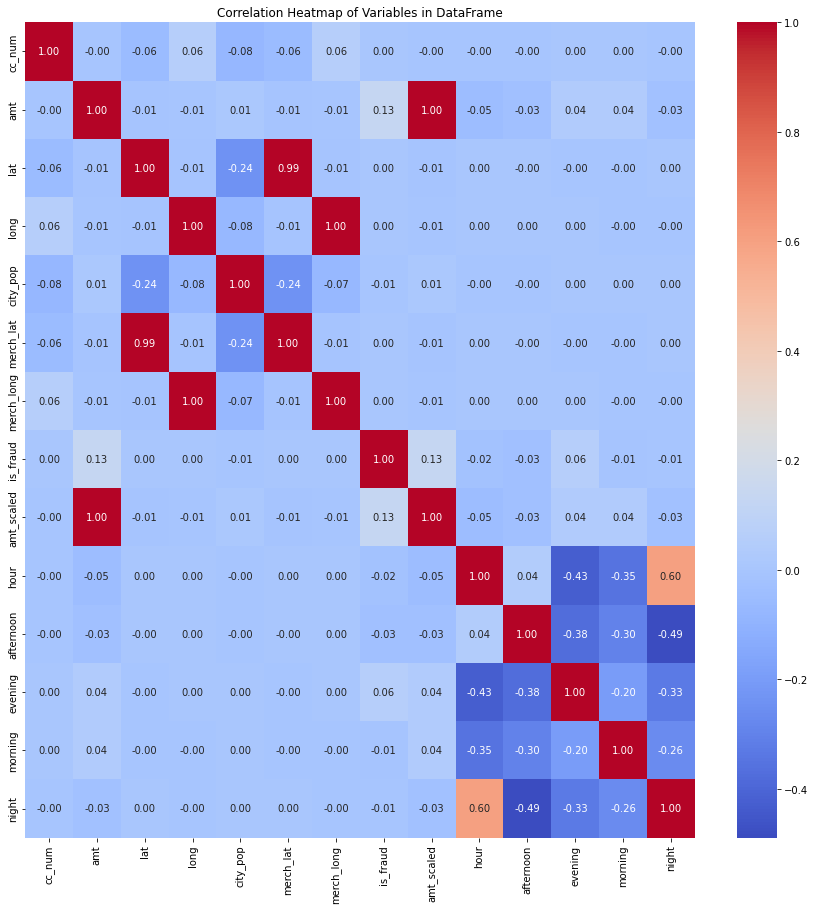

In [238]:
fig, ax = plt.subplots(1, 1, figsize = (15, 15))

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
plt.title('Correlation Heatmap of Variables in DataFrame')
plt.show()

- mercha_lat, mercha_long과 lat, long 변수가 큰 상관관계를 갖는 것을 알 수 있었다.
- 이는 구매자와 상점 사이의 거리가 가깝다는 것을 의미한다.
- 따라서 두 지점 사이의 거리를 계산해보기로 했다.
- 또한 재미있는 것은 도시의 인구수가 lat와 음의 상관관계를 갖는다는 것이었다.


##### 위경도 사이의 거리 계산하기

이 부분은 유클리디안과 같이 거리를 계산하는 것이 아니라, "HarverSine"이라는 위경도 사이의 거리를 계산하는 공식이 존재했다.

따라서 아래의 링크를 참고하여 하버사인 공식을 이해했다.

ref : https://kayuse88.github.io/haversine/

In [239]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # 지구의 반지름을 의미한다.

    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)

    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

In [240]:
df['distance'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])
df['distance']

0          30.212176
1          84.702120
2          67.847742
3          22.303906
4          79.591943
             ...    
491129     98.027030
491130    127.382373
491131    100.074420
491132     80.759302
491133     72.438289
Name: distance, Length: 491134, dtype: float64

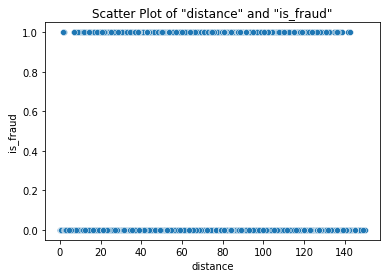

In [241]:
sns.scatterplot(x='distance', y='is_fraud', data=df)
plt.title('Scatter Plot of "distance" and "is_fraud"')
plt.xlabel('distance')
plt.ylabel('is_fraud')
plt.show()

- 거리와 이상거래는 크게 상관이 없는 것으로 확인된다.
- 따라서 구간을 나눠서 한 번 비교해보기로 했다.

In [242]:
df[df["distance"] > 100]["is_fraud"].sum()

299

In [243]:
df[(df["distance"] <= 100) & (df["distance"] > 50)]["is_fraud"].sum()

709

In [244]:
df[df["distance"] <= 50]["is_fraud"].sum()

236

- 50-100km 사이에서 이상거래가 자주 발생하는 것으로 판단된다.
- 거리를 분리해서 각 거리별 is_fraud 비율을 시각화 해보기로 했다.

In [245]:
# 거리 범주 나누기
def categorize_distance(distance):
    if (distance < 50):
        return 'Near'
    elif distance < 100:
        return 'Intermediate'
    else:
        return 'Far'

df['distance_category'] = df['distance'].apply(categorize_distance)
distance_counts = df['distance_category'].value_counts()

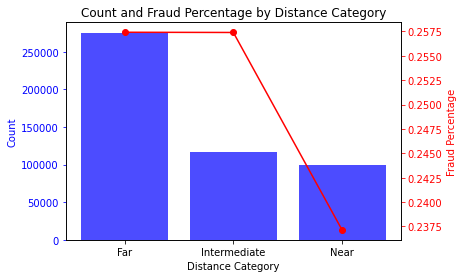

In [246]:
fig, ax1 = plt.subplots()

fraud_per = df.groupby('distance_category')['is_fraud'].mean() * 100

# 카운트 그래프
ax1.bar(distance_counts.index, distance_counts.values, color='b', alpha=0.7, label='Count')
ax1.set_xlabel('Distance Category')
ax1.set_ylabel('Count', color='b')
ax1.tick_params('y', colors='b')
ax1.set_title('Count and Fraud Percentage by Distance Category')

# Fraud Percentage 라인 그래프
ax2 = ax1.twinx()
ax2.plot(fraud_per.index, fraud_percentage.values, color='r', label='Fraud Percentage', marker='o')
ax2.set_ylabel('Fraud Percentage', color='r')
ax2.tick_params('y', colors='r')

# 그래프 출력
plt.show()

## 컬럼이름 변경 및 정리하기

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   category               491134 non-null  object 
 3   amt                    491134 non-null  float64
 4   gender                 491134 non-null  object 
 5   lat                    491134 non-null  float64
 6   long                   491134 non-null  float64
 7   city_pop               491134 non-null  int64  
 8   dob                    491134 non-null  object 
 9   merch_lat              491134 non-null  float64
 10  merch_long             491134 non-null  float64
 11  is_fraud               491134 non-null  int64  
 12  amt_scaled             491134 non-null  float64
 13  hour                   491134 non-null  int64  
 14  slot                   491134 non-nu

In [248]:
df.drop(["hour", "trans_date_trans_time"], axis = 1, inplace=True)

In [250]:
df["birthday"] = pd.to_datetime(df["dob"])

In [251]:
df.drop(["dob"], axis = 1, inplace=True)

In [254]:
df.rename({"merch_lat": "store_lat", "merch_long": "store_long", "lat":"buyer_lat", "long":"buyer_long"}, axis = 1, inplace = True)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   cc_num             491134 non-null  int64         
 1   category           491134 non-null  object        
 2   amt                491134 non-null  float64       
 3   gender             491134 non-null  object        
 4   buyer_lat          491134 non-null  float64       
 5   buyer_long         491134 non-null  float64       
 6   city_pop           491134 non-null  int64         
 7   store_lat          491134 non-null  float64       
 8   store_long         491134 non-null  float64       
 9   is_fraud           491134 non-null  int64         
 10  amt_scaled         491134 non-null  float64       
 11  slot               491134 non-null  object        
 12  afternoon          491134 non-null  uint8         
 13  evening            491134 non-null  uint8   

# 회고

저번 시간 넘어오는 새벽에 컴퓨터가 갑자기 스파크를 마지막으로 갑작스럽게 돌아가시는 바람에,, 듣지 못한 부분을 금일 넘어오는 새벽에 다 수강하였습니다.
따라서 아직 숙지되지 않은 개념이 많아서 조금 많이 부족한 부분이 존재하는 것 같아 아쉽습니다.

오늘 저녁에는 어제 진행해보지 못한 프로젝트를 한 번 작성해보고자 합니다.
작성하는 과정에서 부족한 부분을 다시 채워넣어야겠습니다.

일단 데이터를 확인하면서 변수의 상관관계를 보고 또, 이를 어떻게 전처리할 것인지를 판단하는 과정이 너무 즐거웠습니다.
비유하자면, 요리 메뉴를 정하지 않고 재료를 막 사와서 어떤 음식을 할지 고민하는 느낌이었습니다..ㅎㅎ

그래도 아직 많이 부족한 부분이 있는 것 같아서 이를 보완하고자 계속해서 노력해야겠습니다.

감사합니다 !